# **Introduction to BERTopic**

This notebook relies on the BERTopic documentation and notebooks provided by Maarten Grootendorst. For further documentation please consult the [BERTopic Website](https://maartengr.github.io/BERTopic/index.html) or have a look at this [youtube video](https://www.youtube.com/watch?v=uZxQz87lb84).  

BERTopic is a flexible topic modeling framework that allows users to create customized topic models that can handle various use cases. With its ability to switch compontents it allows also to integrate latest developments in AI (e.g. ChatGPT, Lama).

The difference to LDA for example is that it can embed documents before finding topic clusters, and it generates the number of topics automatically, which you have to specify in advance in most TM algorithms.

# **What is BERT?**

BERT = Bidirectional Encoder Representations from Transformers

BERT is designed to understand the context of words in a sentence by looking at both the words before and after a given word, hence the term "bidirectional." This allows BERT to grasp the meaning of a word based on its surroundings, leading to better comprehension of language nuances. It can be used for Topic Modeling, Sentiment Analysis, Question-Answering, Summarization, Named Entity Recognition etc.

BERT was introduced in 2018 by Google AI Language (see [Devlin 2018](https://arxiv.org/abs/1810.04805)).

It uses a transformer architecture, which relies on attention mechanisms to weigh the importance of different words in a sentence (see [Vaswani et al. 2017](https://arxiv.org/abs/1706.03762))

The input is a sequence of tokens, which are first embedded into vectors (that means that textual data is converted into a numerical representation that can be processed by machine learning models) and then processed in the neural network. The output is a sequence of vectors in which each vector corresponds to an input token with the same index.


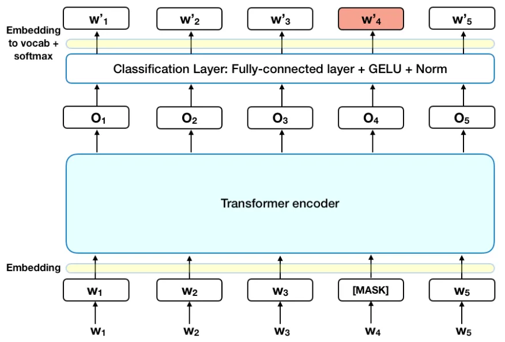


To get started, run the code below to mount your google drive in the notebook, which makes sure you will have access to the files in the folder you copied.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/didip_ss/

/content/drive/MyDrive/didip_ss


Check for updates

In [ ]:
!git pull

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


## **Installation**

Before preparing the data, we install **bertopic** with sentence-transformers from [pypi](https://pypi.org/project/bertopic/) before preparing the data.

**NOTE**: Make sure to select a GPU runtime. Otherwise, the model can take quite some time to create the document embeddings!

In [6]:
!pip install bertopic

We import the BERTopic class from `bertopic` and `pandas`, a library used for interacting and displaying our datasets which are available in a spreadsheet format.

In [ ]:
#pip install pandas

In [7]:
from bertopic import BERTopic
import pandas as pd


# **Prepare data**


As an example we use an excerpt from the Latin vulgate. It comes in a table format with > 1000 entries. First, we read our data into a Pandas DataFrame. Afterwards, we display the variable `df`.

In [9]:
df = pd.read_table('DATA/vulgate_sample_1000.tsv')

In [10]:
df

,id,text
0,2Kings_chapter_20,in diebus illis aegrotavit Ezechias usque ad m...
1,Luke_chapter_17,et ad discipulos suos ait inpossibile est ut n...
2,Isaiah_chapter_59,ecce non est adbreviata manus Domini ut salvar...
3,Job_chapter_39,numquid nosti tempus partus hibicum in petris ...
4,1John_chapter_4,carissimi nolite omni spiritui credere sed pro...
...,...,...
1184,Revelation_chapter_7,post haec vidi quattuor angelos stantes super ...
1185,Obadiah_chapter_1,visio Abdiae haec dicit Dominus Deus ad Edom a...
1186,Genesis_chapter_37,habitavit autem Iacob in terra Chanaan in qua ...
1187,Psalms_chapter_112,alleluia laudate servi Dominum laudate nomen D...


The "text" column of the DataFrame `df` is now converted in a Python list called `dftexts` on that we operate in the following. The 6th element is displayed using the index.

In [11]:
dftexts= df.text.to_list()
dftexts[5]

'audite verbum quod locutus est Dominus super vos domus Israhel haec dicit Dominus iuxta vias gentium nolite discere et a signis caeli nolite metuere quae timent gentes quia leges populorum vanae sunt quia lignum de saltu praecidit opus manuum artificis in ascia argento et auro decoravit illud clavis et malleis conpegit ut non dissolvatur in similitudinem palmae fabricata sunt et non loquentur portata tollentur quia incedere non valent nolite ergo timere ea quia nec male possunt facere nec bene non est similis tui Domine magnus tu et magnum nomen tuum in fortitudine quis non timebit te o rex gentium tuum est enim decus inter cunctos sapientes gentium et in universis regnis eorum nullus est similis tui pariter insipientes et fatui probabuntur doctrina vanitatis eorum lignum est argentum involutum de Tharsis adfertur et aurum de Ofaz opus artificis et manus aerarii hyacinthus et purpura indumentum eorum opus artificum universa haec Dominus autem Deus verus est ipse Deus vivens et rex sem

# **Create Topics**
We create the `topic_model` by instantiating the `BERTopic class` and passing some parameters. We select "multilingual" for our documents as there is no explicit language model for Latin available in the standard pipeline. If we only had English texts, we could use "english". Verbose logging tracks the progress and operations of the model.


In [12]:
topic_model = BERTopic(verbose=True, language="multilingual")

Instead, we could use a sentence transformer from Hugging Face, which provides tools, models, applications etc. for machine learning.

In [ ]:
#!pip install sentence_transformers
#from sentence_transformers import SentenceTransformer
#latin_model = SentenceTransformer('sentence-transformers/all-roberta-large-v1')
#topic_model = BERTopic(verbose=True, embedding_model=latin_model)


We now generate the topics and their probabilities. `fit` trains the topic model on the provided data and `transform` transforms the input data into topic assignments and probabilities (`props`).


In [13]:
topics, probs = topic_model.fit_transform(dftexts)

2024-07-09 11:13:33,217 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/38 [00:00<?, ?it/s]

2024-07-09 11:13:50,169 - BERTopic - Embedding - Completed ✓
2024-07-09 11:13:50,171 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-07-09 11:14:03,638 - BERTopic - Dimensionality - Completed ✓
2024-07-09 11:14:03,641 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-07-09 11:14:03,690 - BERTopic - Cluster - Completed ✓
2024-07-09 11:14:03,700 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-07-09 11:14:04,161 - BERTopic - Representation - Completed ✓


Remember what an embedding is? Embedding is converting textual data into a numerical representation that can be processed by machine learning models.

* **Embeddings**: BERTopic starts with transforming our input documents into numerical representations. Although there are many ways this can be achieved, we typically use sentence-transformers as it is quite capable of capturing the semantic similarity between documents.
* **Dimensionality Reduction:** As embeddings are often high in dimensionality, clustering becomes difficult. Therefore, dimensionality is reduced.  
* **Clustering**: The input embeddings are then grouped to similar embeddings to extract our topics.
* **Tokenizer**: Improves the quality of the topic representation, e.g. in this step stopwords can be removed, it can be focued on single words or n-grams etc.
* **Weighting scheme**: TF-IDF evaluates the importance of a word in a document relative to a collection of documents (corpus). Here, TF-IDF was adjusted to work on a cluster/topic instead of a document.
* **Fine-tune Representations**: e.g. we can use ChatGPT to help us labeling the topics.  

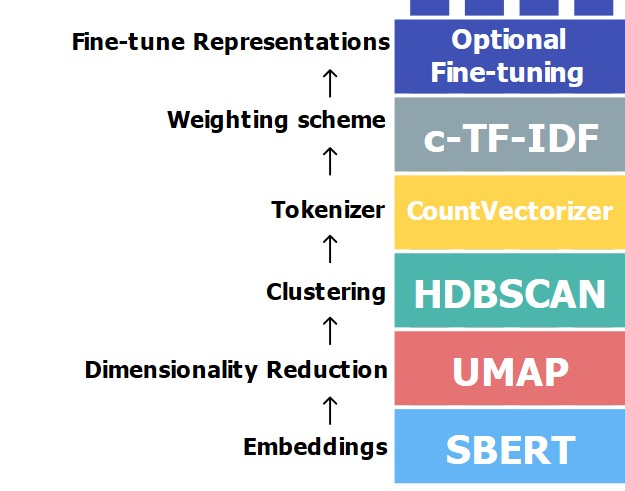

Now we can start investigating the results.

In [15]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,438,-1_et_in_est_ad,"[et, in, est, ad, non, qui, autem, de, eius, ut]",[Iesus ergo ante sex dies paschae venit Bethan...
1,0,118,0_et_non_in_est,"[et, non, in, est, me, qui, eius, ut, si, quia]",[et dixit ad me fili hominis quodcumque invene...
2,1,97,1_et_in_filii_ad,"[et, in, filii, ad, autem, qui, de, est, israh...",[erant autem Ahab septuaginta filii in Samaria...
3,2,95,2_et_dominus_in_ad,"[et, dominus, in, ad, est, non, de, qui, israh...",[in tempore illo dicit Dominus ero Deus univer...
4,3,72,3_et_in_ad_non,"[et, in, ad, non, est, dominus, dicit, cum, ha...",[verbum quod factum est ad Hieremiam a Domino ...
5,4,64,4_et_in_est_qui,"[et, in, est, qui, ad, eius, de, super, quae, ...",[post quae et huiuscemodi veritatem venit Senn...
6,5,58,5_in_et_eius_non,"[in, et, eius, non, qui, est, domino, dominus,...",[alleluia confitemini Domino quoniam bonus quo...
7,6,53,6_me_domine_in_et,"[me, domine, in, et, mea, meam, eius, non, mih...",[victori canticum David in te Domine speravi n...
8,7,39,7_david_saul_et_ad,"[david, saul, et, ad, in, ionathan, autem, eiu...",[locutus est autem Saul ad Ionathan filium suu...
9,8,24,8_et_in_abraham_ad,"[et, in, abraham, ad, est, deus, moses, autem,...",[Moses autem pascebat oves Iethro cognati sui ...


We can have a closer look at specific topics. -1 refers to all outliers and should typically be ignored.

In [ ]:
topic_model.get_topic(-1)

[('et', 0.042116697104420314),
 ('in', 0.033080039318850556),
 ('est', 0.023157052530525416),
 ('ad', 0.02106553817391356),
 ('non', 0.020784169280990618),
 ('qui', 0.020666159071005715),
 ('autem', 0.01902440551096124),
 ('eius', 0.016856254248892706),
 ('de', 0.016780103221060178),
 ('ut', 0.016161122429006032)]

Next, let's take a look at the most frequent topic that was generated, topic 0:

In [ ]:
topic_model.get_topic(0)

[('et', 0.04226733143866764),
 ('in', 0.03333486292520817),
 ('dominus', 0.03051292509170215),
 ('ad', 0.02503583561483832),
 ('non', 0.02201601644326105),
 ('est', 0.02134388977864182),
 ('de', 0.019627454331605655),
 ('super', 0.017996152427731327),
 ('qui', 0.017297106908137693),
 ('israhel', 0.016133318416597483)]

# **Save and load the model**

Before we move on, we save the model so that we can load it at a later point and don't have to create the model again.  



In [17]:
topic_model.save("D02/data/vulgata.mm")

2024-07-09 11:15:31,078 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
topic_model = BERTopic.load("D02/data/vulgata.mm")

# **Fine-tune topic representation after training BERTopic**

After the training of the model, we can remove the stopwords from the topic representation. We can either define a list of stopword manually, or read a predefined list.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Define the stopwords
#stop_words = ["et", "in", "est", "ad", "qui", "autem", "non", "de", "eius", "ut", "quae", "cum", "si", "eum"]

with open('D02/data/stopwords_latin.txt', 'r') as file:
  stop_words = [word.strip() for word in file.readlines()]

vectorizer_model = CountVectorizer(stop_words=stop_words)
topic_model.update_topics(dftexts, vectorizer_model=vectorizer_model)

#**Investigate topics**

Now we can investigate the updated model again. What was the method called to get information on the topics?

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,451,-1_israhel_dominus_domini_dei,"[israhel, dominus, domini, dei, rex, filii, de...",[verbum quod locutus est Dominus de Babylone e...
1,0,187,0_dominus_israhel_deus_domini,"[dominus, israhel, deus, domini, terra, terram...",[vae pastoribus qui disperdunt et dilacerant g...
2,1,98,1_deus_dominus_dei_cor,"[deus, dominus, dei, cor, praecepta, domine, h...",[et dixit ad me fili hominis quodcumque invene...
3,2,88,2_filii_filius_israhel_domini,"[filii, filius, israhel, domini, regis, iuda, ...",[erant autem Ahab septuaginta filii in Samaria...
4,3,74,3_dominus_domini_verbum_terra,"[dominus, domini, verbum, terra, deus, iuda, e...",[verbum quod factum est ad Hieremiam a Domino ...
5,4,53,4_domine_david_deus_dominus,"[domine, david, deus, dominus, canticum, anima...",[victori canticum David in te Domine speravi n...
6,5,43,5_david_saul_ionathan_israhel,"[david, saul, ionathan, israhel, abner, samuhe...",[locutus est autem Saul ad Ionathan filium suu...
7,6,32,6_domino_aeternum_misericordia_domini,"[domino, aeternum, misericordia, domini, domin...",[confitemini Domino quoniam bonus quoniam in a...
8,7,30,7_genuit_abraham_moses_isaac,"[genuit, abraham, moses, isaac, deus, siclos, ...",[congregavitque Iosue omnes tribus Israhel in ...
9,8,22,8_iob_respondens_numquid_deum,"[iob, respondens, numquid, deum, deo, verba, d...",[et respondens Iob ait vere scio quod ita sit ...


And investigate specific topics.

In [ ]:
topic_model.get_topic(2)

[('filii', 0.03806982555045545),
 ('filius', 0.027585201002262014),
 ('israhel', 0.02439530508767922),
 ('domini', 0.019867433019715625),
 ('regis', 0.017009790177598582),
 ('iuda', 0.015597667547247826),
 ('hierusalem', 0.014920802417507763),
 ('dei', 0.014703894444278727),
 ('genuit', 0.014644944562929424),
 ('dominus', 0.01267167656856017)]

We can also try to assign our own labels for the topics.

In [ ]:
topic_labels = topic_model.generate_topic_labels(nr_words=20, topic_prefix=False, separator=" - ")
topic_model.set_topic_labels(topic_labels)
# topic_model.set_topic_labels({2: "Lineages"})

In [ ]:
#Things that we can try out to improve the quality of the topics

#Change n-grams without re-fitting our entire model
#topic_model.update_topics(dftexts, n_gram_range=(1, 3))

#Merge specific topics
#topic_model.merge_topics(dftexts, topics_to_merge=[1, 8, 12])

# Reduce the number of topics by iteratively merging them
#topic_model.reduce_topics(dftexts, nr_topics=10)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,CustomName,Representation,Representative_Docs
0,-1,451,-1_israhel_dominus_domini_dei,israhel - dominus - domini - dei - rex - filii...,"[israhel, dominus, domini, dei, rex, filii, de...",[verbum quod locutus est Dominus de Babylone e...
1,0,187,0_dominus_israhel_deus_domini,dominus - israhel - deus - domini - terra - te...,"[dominus, israhel, deus, domini, terra, terram...",[vae pastoribus qui disperdunt et dilacerant g...
2,1,98,1_deus_dominus_dei_cor,deus - dominus - dei - cor - praecepta - domin...,"[deus, dominus, dei, cor, praecepta, domine, h...",[et dixit ad me fili hominis quodcumque invene...
3,2,88,2_filii_filius_israhel_domini,filii - filius - israhel - domini - regis - iu...,"[filii, filius, israhel, domini, regis, iuda, ...",[erant autem Ahab septuaginta filii in Samaria...
4,3,74,3_dominus_domini_verbum_terra,dominus - domini - verbum - terra - deus - iud...,"[dominus, domini, verbum, terra, deus, iuda, e...",[verbum quod factum est ad Hieremiam a Domino ...
5,4,53,4_domine_david_deus_dominus,domine - david - deus - dominus - canticum - a...,"[domine, david, deus, dominus, canticum, anima...",[victori canticum David in te Domine speravi n...
6,5,43,5_david_saul_ionathan_israhel,david - saul - ionathan - israhel - abner - sa...,"[david, saul, ionathan, israhel, abner, samuhe...",[locutus est autem Saul ad Ionathan filium suu...
7,6,32,6_domino_aeternum_misericordia_domini,domino - aeternum - misericordia - domini - do...,"[domino, aeternum, misericordia, domini, domin...",[confitemini Domino quoniam bonus quoniam in a...
8,7,30,7_genuit_abraham_moses_isaac,genuit - abraham - moses - isaac - deus - sicl...,"[genuit, abraham, moses, isaac, deus, siclos, ...",[congregavitque Iosue omnes tribus Israhel in ...
9,8,22,8_iob_respondens_numquid_deum,iob - respondens - numquid - deum - deo - verb...,"[iob, respondens, numquid, deum, deo, verba, d...",[et respondens Iob ait vere scio quod ita sit ...


In [ ]:
topic_model.get_topic_freq().head(7)

,Topic,Count
1,-1,451
0,0,187
3,1,98
4,2,88
6,3,74
5,4,53
10,5,43


# **Visualize Topics**
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation.
Instead, we can visualize the topics that were generated using different methods.

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_documents(dftexts)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_barchart(width=280, height=330, top_n_topics=15, n_words=10)